In [9]:
# 利用torch.nn实现线性回归
import torch
import numpy as np
import matplotlib.pyplot as plt 
from torch import nn
from torch.utils import data as Data


In [10]:
#定义样本大小，特征数量及真实参数
num_input = 2
num_example = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2

#设置随机数种子，有利复现
torch.manual_seed(1)
#生成服从0-1分布的特征
features = torch.randn((num_example, num_input))
#根据真实公式生成标签
#labels = torch.matmul(features, torch.tensor(true_w)) +true_b
labels = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
#添加随机噪声
labels += torch.randn(num_example)*0.01

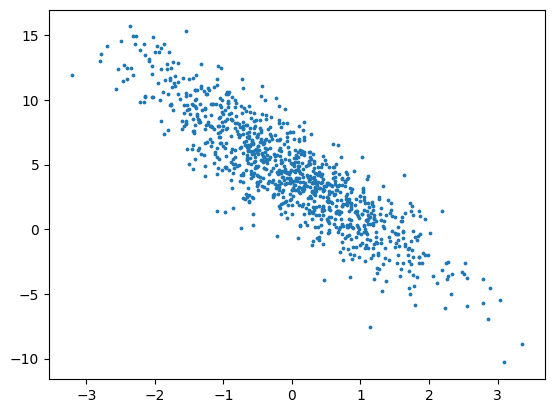

In [11]:
plt.scatter(features[:, 1], labels, s=3)  


In [12]:
data_set = Data.TensorDataset(features, labels)
batch_size = 1
data_iter = Data.DataLoader(data_set, batch_size, True)


In [13]:

net = nn.Sequential(nn.Linear(2, 1))
for par in net[0].parameters():
    par.requires_grad = True

In [14]:
from torch.nn import init
loss = nn.MSELoss('mean')
opt = torch.optim.SGD(net.parameters(),0.03)

c:\Users\chen\miniconda3\envs\torch-gpu\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [15]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        opt.zero_grad()
        l.backward()
        opt.step()

        """ w = net[0].weight
        print('w的估计：',  w.reshape(true_w.shape))
        print("w的grad: ", w.grad)
        b = net[0].bias.data
        print('b的估计：',  b)
        print("b的grad", b.grad) """
    l = loss(net(features).reshape(-1), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000111
epoch 2, loss 0.000113
epoch 3, loss 0.000104
epoch 4, loss 0.000105
epoch 5, loss 0.000105
epoch 6, loss 0.000115
epoch 7, loss 0.000105
epoch 8, loss 0.000117
epoch 9, loss 0.000133
epoch 10, loss 0.000104


In [16]:
w = net[0].weight
print('w的估计：',  w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计：',  b)


w的估计： tensor([ 1.9989, -3.4005], grad_fn=<ViewBackward0>)
b的估计： tensor([4.2007])
